<a href="https://colab.research.google.com/github/7ft10/C4ArchitectureExamples/blob/main/Example_Clouding_Atlassian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clouding Atlassian Architecture Example

* [Current State Diagram](https://colab.research.google.com/drive/15XPAFlQwWtpUbDZC_yBMFfKjrfuFEIf8#scrollTo=wVFxWnQnazpr&line=1&uniqifier=1)
* [Future State Diagram](https://colab.research.google.com/drive/15XPAFlQwWtpUbDZC_yBMFfKjrfuFEIf8#scrollTo=8cRYTJwteobu&line=1&uniqifier=1)

## Why 

Keeping architecture diagrams up to date is difficult. Creating them is just as difficult. Architects spend most of their time gathering the right icons, drawing lines in Miro or Viso making sure that they are the right type etc. etc. etc. What a waste of time. 

Instead architects should be focused on ensuring that the current state is correct and that proposed changes to the enterprise ecosystem have taken into account all other systems that may be impacted. 

Architecture diagrams as code (ADAC) is a way of allowing architects to focus on the right things and stop wasting time. It can also help other areas of the business by creating or leveraging a configuration management database (CMDB). 

ADAC can also be extended to include the personas that interact with the systems. This is an important part of the impact analysis and can be the starting point for other agile techniques such as epic and story writing. 

## Guide 

Colab is a free tool for google users to run end edit Jupyter files which makes it a perfect candidate for any company but especially a company that uses google drive. It is possible to connect this repository to Google Drive and/or Github for further document control and archiving. 

*C4 Model* is a great starting point for any architecture diagram repository as they can easily map to the the levels of testing, for example context is system testing, code is unit testing. With the right diagrams and subsequently the right level of thinking architecture, development and testing can all use the same diagrams to create meaningful and valuable assets for the company. See https://c4model.com/ for more details. 

*Diagrams* is a phyton library that allows for diagrams to be created from code. See https://diagrams.mingrammer.com/docs/nodes/c4 for more details. 

## How to run 

Run notebook cells in order. Please install "diagrams" first, and then default settings to correctly set up the environment.

The simplest way to do this is Ctrl-F9 to "Run all".

## Create Repository

The repository can be extracted into a stand alone Python file (.py) based on a set of YAML files. The YAML files can be generated from the CMDB or whatever. Note: Json or any other kind of simple text based storage could also be used. 

Create a set of YAML files, like the following, called API.yaml:
```YAML
id: API
nodeType: Container
name: API
description: |-
  Python application
```

These are the default identification names of a container. More attributes can be added, such as..
```YAML
id: API
nodeType: Container
name: API
description: |-
  Python application
server: 192.168.0.1
port: 8080
sourceCodeLocation: github/dddd
```

These attributes can be used for other details within the diagrams. 

There are two sections to a repository, the first loads the helper classes.

```python
from urllib import request
[name, response] = request.urlretrieve('Repository/SeventFtNode.py', '_SeventFtNode.py')
from _SeventFtNode import SevenftRepository, SevenftNode
```

The second are the namespaces that encapsulate the systems, personas, etc. The following example shows a persona namespace with a banking customer persona loaded from the repository yaml file. 

```python
class _Personas(SevenftRepository):
  def __init__(self):
    self.BankingCustomer:SevenftNode = SevenftNode.LoadFromYaml('Repository/Personas/Banking%20Customer.yaml')
globals()['Personas'] = _Personas()
```
The final line puts the personas into the global namespace. 

The repository can then be loaded like this...

```python 
from urllib import request
request.urlretrieve('https://git/main/Repository.py', 'Repository.py')
```
then loading the model and classes 
```python 
from Repository import Systems, Personas, DataStores, ExternalSystems
```

Then the personas, systems etc. are loaded via the global namespaces using the get function. 

```python 
with Diagram(** settings) as diagram:
  banking_customer = Personas.BankingCustomer.Get()
```

Repositories could also be versioned and released as required with leadership oversight and approvals. There could also be current state and future state repositories which update as new systems are added and retired.

### Printed 

To display all elements within the namespace use the print function. 

```python 
Personas.Print()
```
Or to print a specific element's details, use the print function on the element. 

```python 
Personas.BankingCustomer.Print()
```

### Images

The created images can be exported to google drive or downloaded manually and included in confluence documentation. There is also Jupyter plugins for confluence that allow for visualisation (e.g. https://marketplace.atlassian.com/apps/1220365/jupyter-notebook-viewer-for-confluence?tab=overview&hosting=cloud) 

In [16]:
#@title Install Diagrams
import os
result = os.system('pip install diagrams')

In [17]:
#@markdown ## Get Repository
from urllib import request

baseUrl = "https://raw.githubusercontent.com/7ft10/C4ArchitectureExamples/main/"
[name, response] = request.urlretrieve(baseUrl + 'Repository/CloudingAtlassianRepository.py', '_CloudingAtlassianRepository.py')

In [18]:
#@markdown ## Settings

default_settings = {
  "show": False,
  "outformat": "png",
  "graph_attr":  {
    "splines": "spline",
    "fontsize": "10",
    "bgcolor": "lightgrey"
  },
  "node_attr": {
    "fontsize": "8px",
    "width": "1.8"
  }
} 

In [19]:
#@markdown ## Print Repository
from _CloudingAtlassianRepository import Personas, InternalSystems, ExternalSystems

Personas.Print()
InternalSystems.Print()
ExternalSystems.Print()

---

## ExternalUser

| Key         | Value       |
                   | ----------- | ----------- |
| id | ExternalUser |
| nodeType | Person |
| name | External Users |
| description | Several lines of text,
with some "quotes" of various 'types',
and also a blank line:

and some text with
  extra indentation
on the next line,
plus another line at the end. |

---

## InternalUser

| Key         | Value       |
                   | ----------- | ----------- |
| id | InternalUser |
| nodeType | Person |
| name | Internal Users |
| description | Several lines of text,
with some "quotes" of various 'types',
and also a blank line:

and some text with
  extra indentation
on the next line,
plus another line at the end. |

---

## RemoteUser

| Key         | Value       |
                   | ----------- | ----------- |
| id | RemoteUser |
| nodeType | Person |
| name | Remote Users |
| description | Several lines of text, |

---

## ActiveDirectory

| Key         | Value       |
                   | ----------- | ----------- |
| id | ActiveDirectory |
| nodeType | Custom |
| name | Active Directory |
| description | Active Directory |
| technology | Microsoft Active Directory |
| icon | https://www.outsystems.com/Forge_CW/_image.aspx/Q8LvY--6WakOw9afDCuuGXsjTvpZCo5fbFxdpi8oIBI=/active-directory-core-simplified-2023-01-04%2000-00-00-2023-05-05%2011-44-13 |

---

## Bamboo

| Key         | Value       |
                   | ----------- | ----------- |
| id | Bamboo |
| nodeType | Container |
| name | Bamboo (Server) |
| description | Bamboo |
| technology | Linux |
| icon | https://w7.pngwing.com/pngs/126/46/png-transparent-bamboo-atlassian-continuous-integration-jira-confluence-vision-blue-text-trademark.png |
| label | Bamboo (Server)
Container Linux <br/>
bamboo.internal.server.com.au <br/>
192.168.61.150 |
| CPU | None |
| RAM | None |
| Storage | 124.5GB |
| Type | V |
| OS | Linux |
| Network Zone | None |
| Application Version | 8.13.2 |

---

## BitBucket

| Key         | Value       |
                   | ----------- | ----------- |
| id | BitBucket |
| nodeType | Container |
| name | BitBucket (Server) |
| description | BitBucket |
| technology | Linux |
| icon | https://w7.pngwing.com/pngs/126/46/png-transparent-bitbucket-atlassian-continuous-integration-jira-confluence-vision-blue-text-trademark.png |
| label | BitBucket (Server)
Container Linux <br/>
bitbucket.internal.server.com.au <br/>
192.168.61.350 |
| CPU | None |
| RAM | None |
| Storage | 124.5GB |
| Type | V |
| OS | Linux |
| Network Zone | None |
| Application Version | 8.13.2 |

---

## Citrix

| Key         | Value       |
                   | ----------- | ----------- |
| id | Citrix |
| nodeType | Custom |
| name | Citrix |
| description | Citrix |
| icon | https://Citrix.icon |

---

## Confluence

| Key         | Value       |
                   | ----------- | ----------- |
| id | Confluence |
| nodeType | Container |
| name | Confluence (Server) |
| description | Confluence |
| technology | Linux |
| icon | https://w7.pngwing.com/pngs/282/343/png-transparent-confluence-atlassian-logo-jira-sharepoint-confluence-health-mares-building-text-logo-area.png |
| label | Bamboo (Server)
Container Linux <br/>
confluence.internal.server.com.au <br/>
192.168.110.100 |
| CPU | None |
| RAM | None |
| Storage | 124.5GB |
| Type | V |
| OS | Linux |
| Network Zone | None |
| Application Version | 8.13.2 |

---

## ConfluenceNonProd

| Key         | Value       |
                   | ----------- | ----------- |
| id | ConfluenceNonProd |
| nodeType | Container |
| name | Confluence (Server) (Non-Production) |
| description | Confluence Non-Production |
| technology | Linux |
| icon | https://w7.pngwing.com/pngs/282/343/png-transparent-confluence-atlassian-logo-jira-sharepoint-confluence-health-mares-building-text-logo-area.png |
| label | Bamboo (Server)
Container Linux <br/>
confluence-dev.internal.server.com.au <br/>
192.168.110.200 |
| CPU | None |
| RAM | None |
| Storage | 124.5GB |
| Type | V |
| OS | Linux |
| Network Zone | None |
| Application Version | 8.13.2 |

---

## Disc

| Key         | Value       |
                   | ----------- | ----------- |
| id | Disc |
| nodeType | Custom |
| name | Disc |
| description | Several lines of text |
| technology | IBMi |
| icon | https://w7.pngwing.com/pngs/1/875/png-transparent-as400-ibm.png |

---

## GitLab

| Key         | Value       |
                   | ----------- | ----------- |
| id | GitLab |
| nodeType | Custom |
| name | GitLab |
| description | GitLab |
| icon | https://about.gitlab.com/images/press/logo/png/gitlab-logo-100.png |

---

## GlobalProtect

| Key         | Value       |
                   | ----------- | ----------- |
| id | GlobalProtect |
| nodeType | Custom |
| name | GlobalProtect |
| description | GlobalProtect |
| icon | https://GlobalProtect.icon |

---

## Intranet

| Key         | Value       |
                   | ----------- | ----------- |
| id | Intranet |
| nodeType | System |
| name | Intranet |
| description | The Hub |
| notes | Part of the on-prem confluence implementation,
to be migrated not a new system. |

---

## Jenkins

| Key         | Value       |
                   | ----------- | ----------- |
| id | Jenkins |
| nodeType | Custom |
| name | Jenkins |
| description | Jenkins |
| technology | Jenkins |
| icon | https://Jenkins.icon |

---

## Jira

| Key         | Value       |
                   | ----------- | ----------- |
| id | Jira |
| nodeType | Container |
| name | Jira (Server) |
| description | Jira |
| technology | Linux |
| icon | None |
| label | Bamboo (Server)
Container Linux <br/>
jira.internal.server.com.au <br/>
192.168.110.100 |
| CPU | None |
| RAM | None |
| Storage | 124.5GB |
| Type | V |
| OS | Linux |
| Network Zone | None |
| Application Version | 8.13.2 |

---

## JiraNonProd

| Key         | Value       |
                   | ----------- | ----------- |
| id | JiraNonProd |
| nodeType | Container |
| name | Jira (Server) (Non-Production) |
| description | Jira Non-Production |
| technology | Linux |
| icon | None |
| label | Bamboo (Server)
Container Linux <br/>
jira-dev.internal.server.com.au <br/>
192.168.110.200 |
| CPU | None |
| RAM | None |
| Storage | 124.5GB |
| Type | V |
| OS | Linux |
| Network Zone | None |
| Application Version | 8.13.2 |

---

## Okta

| Key         | Value       |
                   | ----------- | ----------- |
| id | Okta |
| nodeType | Custom |
| name | Okta |
| description | Okta |
| icon | https://Okta.icon |

---

## PowerBi

| Key         | Value       |
                   | ----------- | ----------- |
| id | PowerBi |
| nodeType | Custom |
| name | PowerBi |
| description | PowerBi |
| technology | PowerBi |
| icon | https://www.clipartmax.com/png/middle/16-161548_power-bi-logo-microsoft-vector-eps-free-download-icons-power-bi-logo.png |

---

## ServiceNow

| Key         | Value       |
                   | ----------- | ----------- |
| id | ServiceNow |
| nodeType | Custom |
| name | ServiceNow |
| description | ServiceNow |
| icon | https://servicenow.icon |

---

## ConfluenceCloud

| Key         | Value       |
                   | ----------- | ----------- |
| id | ConfluenceCloud |
| nodeType | Custom |
| name | Confluence (Cloud) |
| description | Confluence |
| icon | https://w7.pngwing.com/pngs/282/343/png-transparent-confluence-atlassian-logo-jira-sharepoint-confluence-health-mares-building-text-logo-area.png |

---

## JiraCloud

| Key         | Value       |
                   | ----------- | ----------- |
| id | JiraCloud |
| nodeType | Custom |
| name | Jira (Cloud) |
| description | Jira |
| icon | https://w7.pngwing.com/pngs/282/343/png-transparent-jira-atlassian-logo-jira-sharepoint-jira-health-mares-building-text-logo-area.png |

---

## NewRelic

| Key         | Value       |
                   | ----------- | ----------- |
| id | NewRelic |
| nodeType | Custom |
| name | NewRelic |
| description | NewRelic |
| icon | https://newrelic.com/themes/custom/erno/assets/mediakit/new_relic_logo_vertical.png |

# Diagrams

## Current State Atlassian Suite Context Diagram

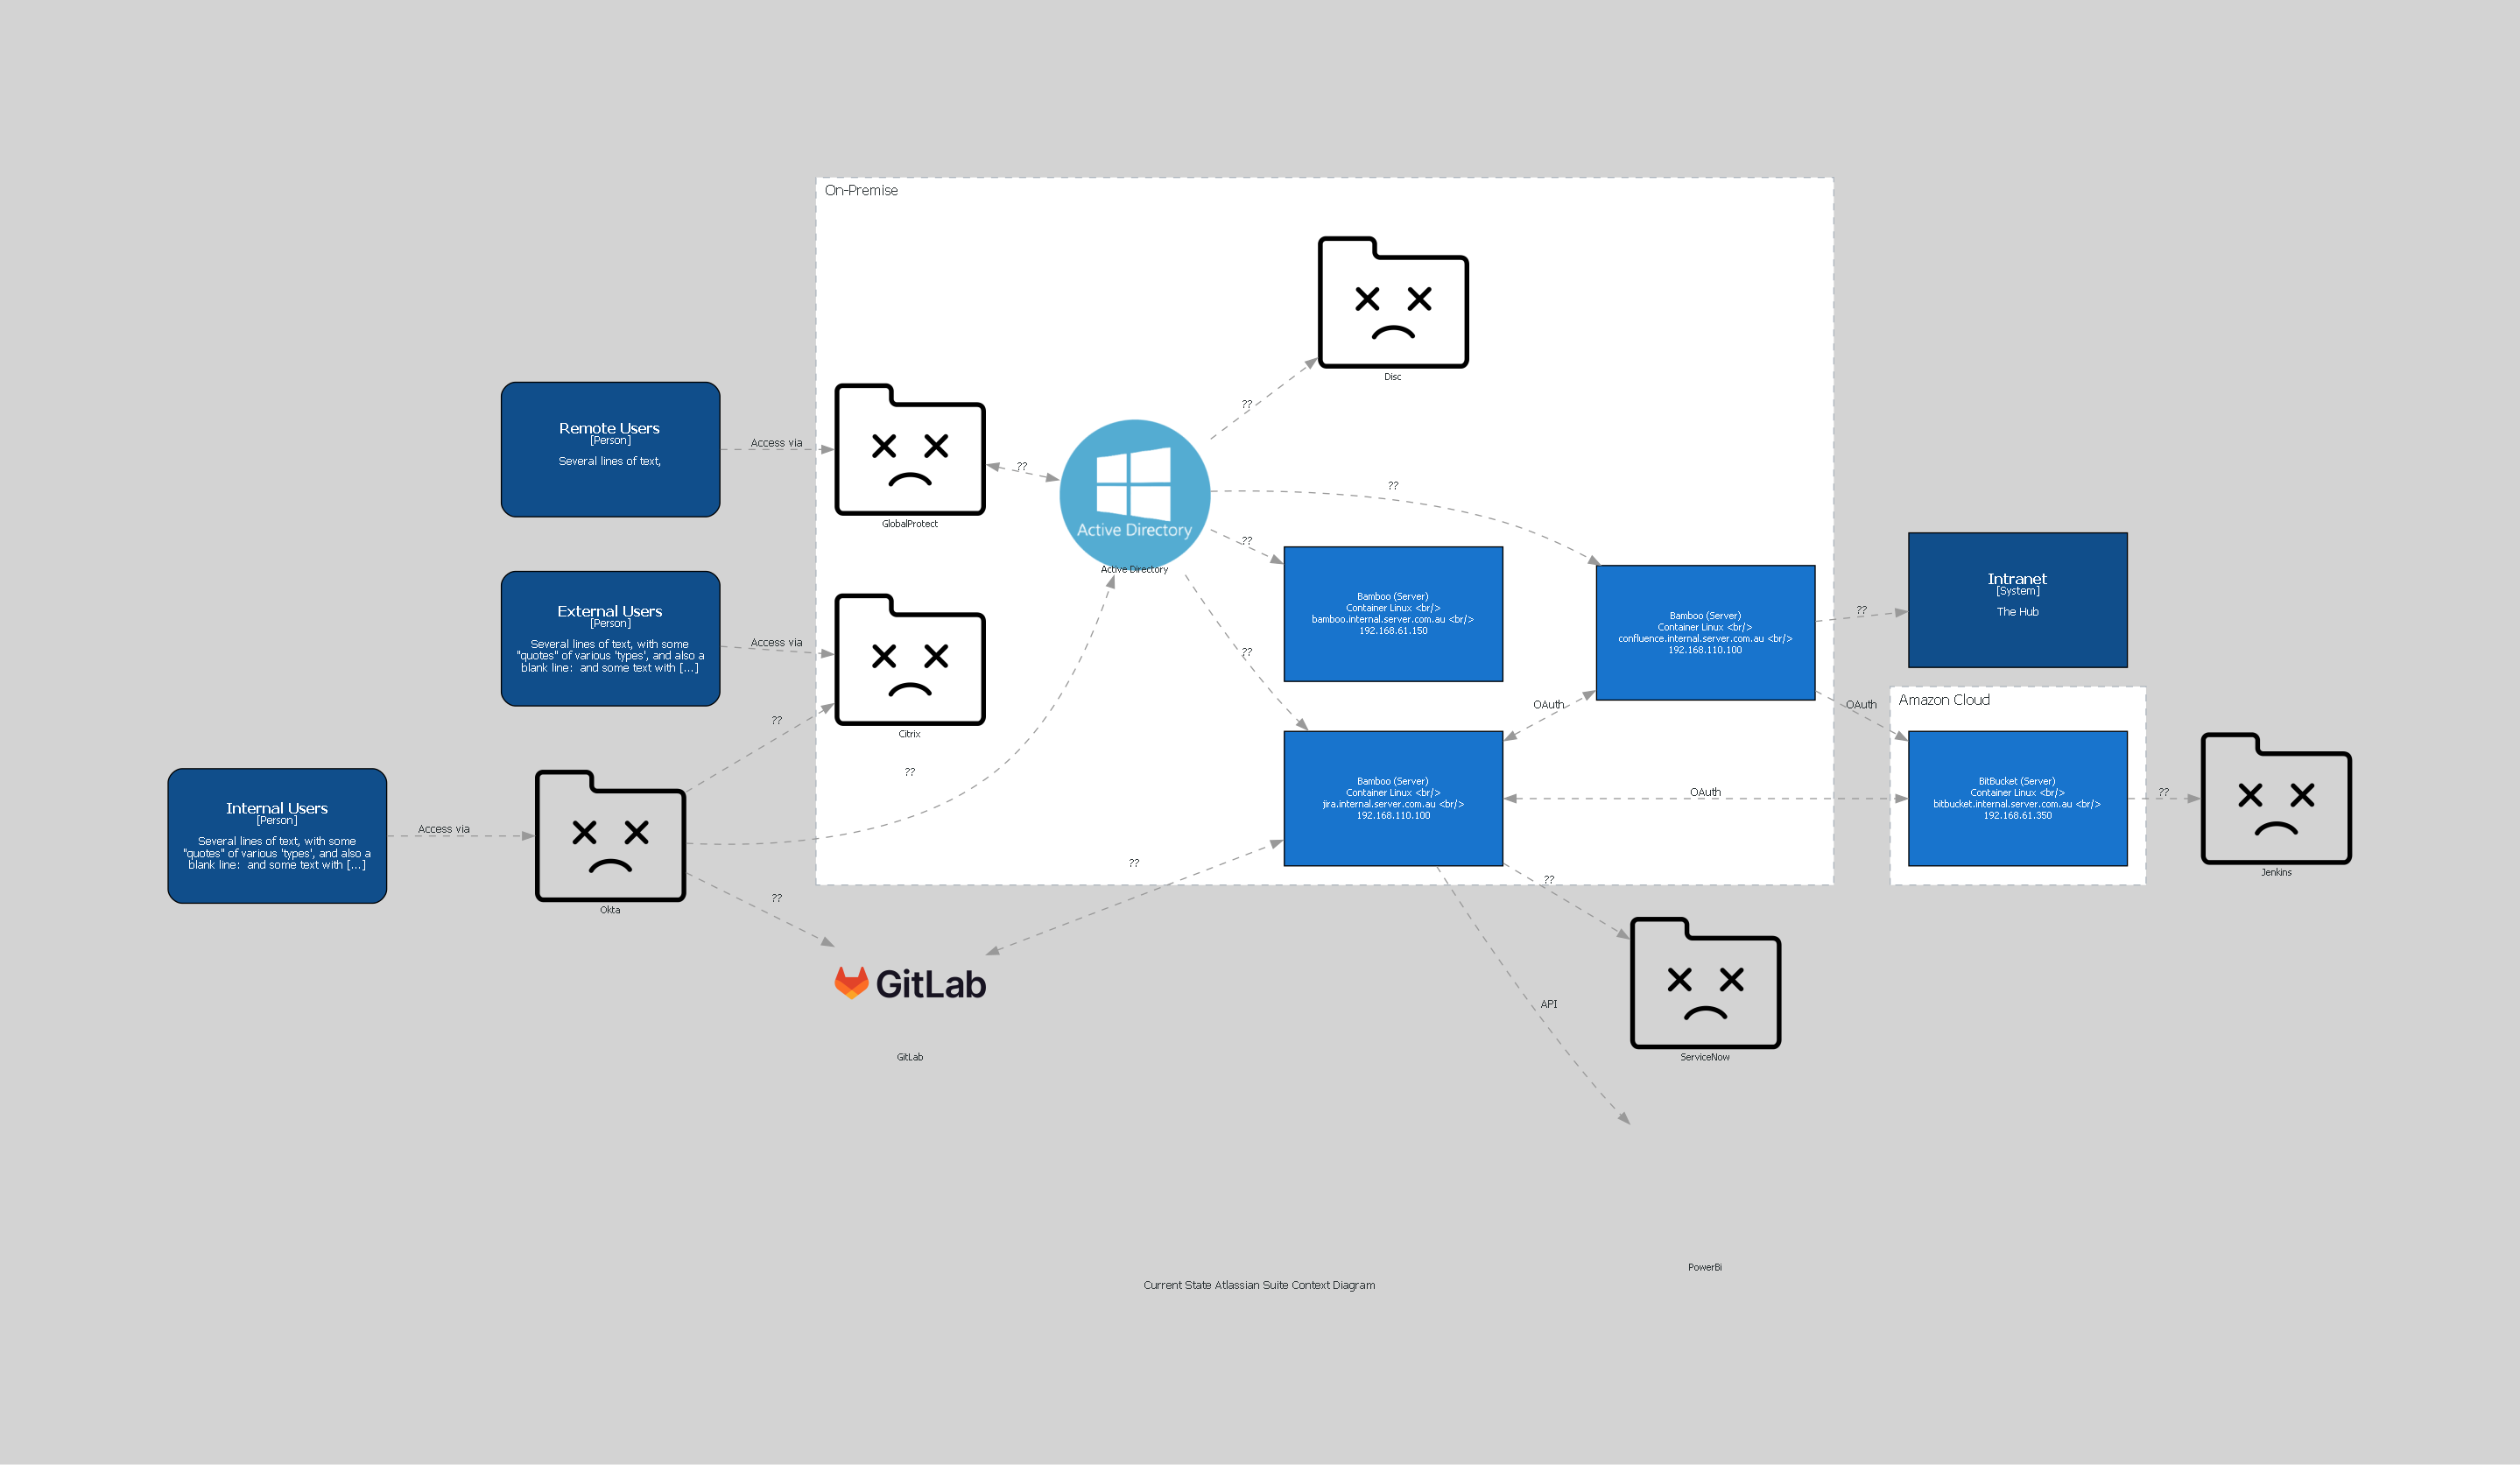

In [20]:
#@title Current State Definition
from IPython.display import display, Markdown
from diagrams import Diagram
from diagrams.c4 import SystemBoundary, Relationship
from _CloudingAtlassianRepository import Personas, InternalSystems, ExternalSystems

settings = { **default_settings, **{
  "name": "Current State Atlassian Suite Context Diagram"
}}

with Diagram(** settings) as diagram:
  internalUsers = Personas.InternalUser.Get()
  remoteUsers = Personas.RemoteUser.Get()
  externalUsers = Personas.ExternalUser.Get()

  with SystemBoundary("On-Premise"):
    activeDirectory = InternalSystems.ActiveDirectory.Get()
    globalProtect = InternalSystems.GlobalProtect.Get()
    bamboo = InternalSystems.Bamboo.Get()
    confluence = InternalSystems.Confluence.Get()
    jira = InternalSystems.Jira.Get()
    disc = InternalSystems.Disc.Get()
    citrix = InternalSystems.Citrix.Get()

  with SystemBoundary("Amazon Cloud"):
    bitBucket = InternalSystems.BitBucket.Get()

  jenkins = InternalSystems.Jenkins.Get()
  serviceNow = InternalSystems.ServiceNow.Get()
  powerBi = InternalSystems.PowerBi.Get()
  intranet = InternalSystems.Intranet.Get()
  okta = InternalSystems.Okta.Get()
  gitLab = InternalSystems.GitLab.Get()

  internalUsers >> Relationship("Access via") >> [okta]
  remoteUsers >> Relationship("Access via") >> [globalProtect]
  externalUsers >> Relationship("Access via") >> [citrix]
  okta >> Relationship("??") >> [gitLab, activeDirectory, citrix]
  jira >> Relationship("??") >> [serviceNow]
  gitLab >> Relationship("??") << [jira]
  jira >> Relationship("OAuth") << [bitBucket, confluence]
  globalProtect >> Relationship("??") << [activeDirectory]
  activeDirectory >> Relationship("??") >> [jira, confluence, bamboo, disc]
  confluence >> Relationship("??") >> [intranet]
  confluence >> Relationship("OAuth") >> [bitBucket]
  jira >> Relationship("API") >> [powerBi]
  bitBucket >> Relationship("??") >> [jenkins]

display(Markdown("## " + settings["name"]))
display(diagram)

## Transition State Atlassian Suite Context Diagram

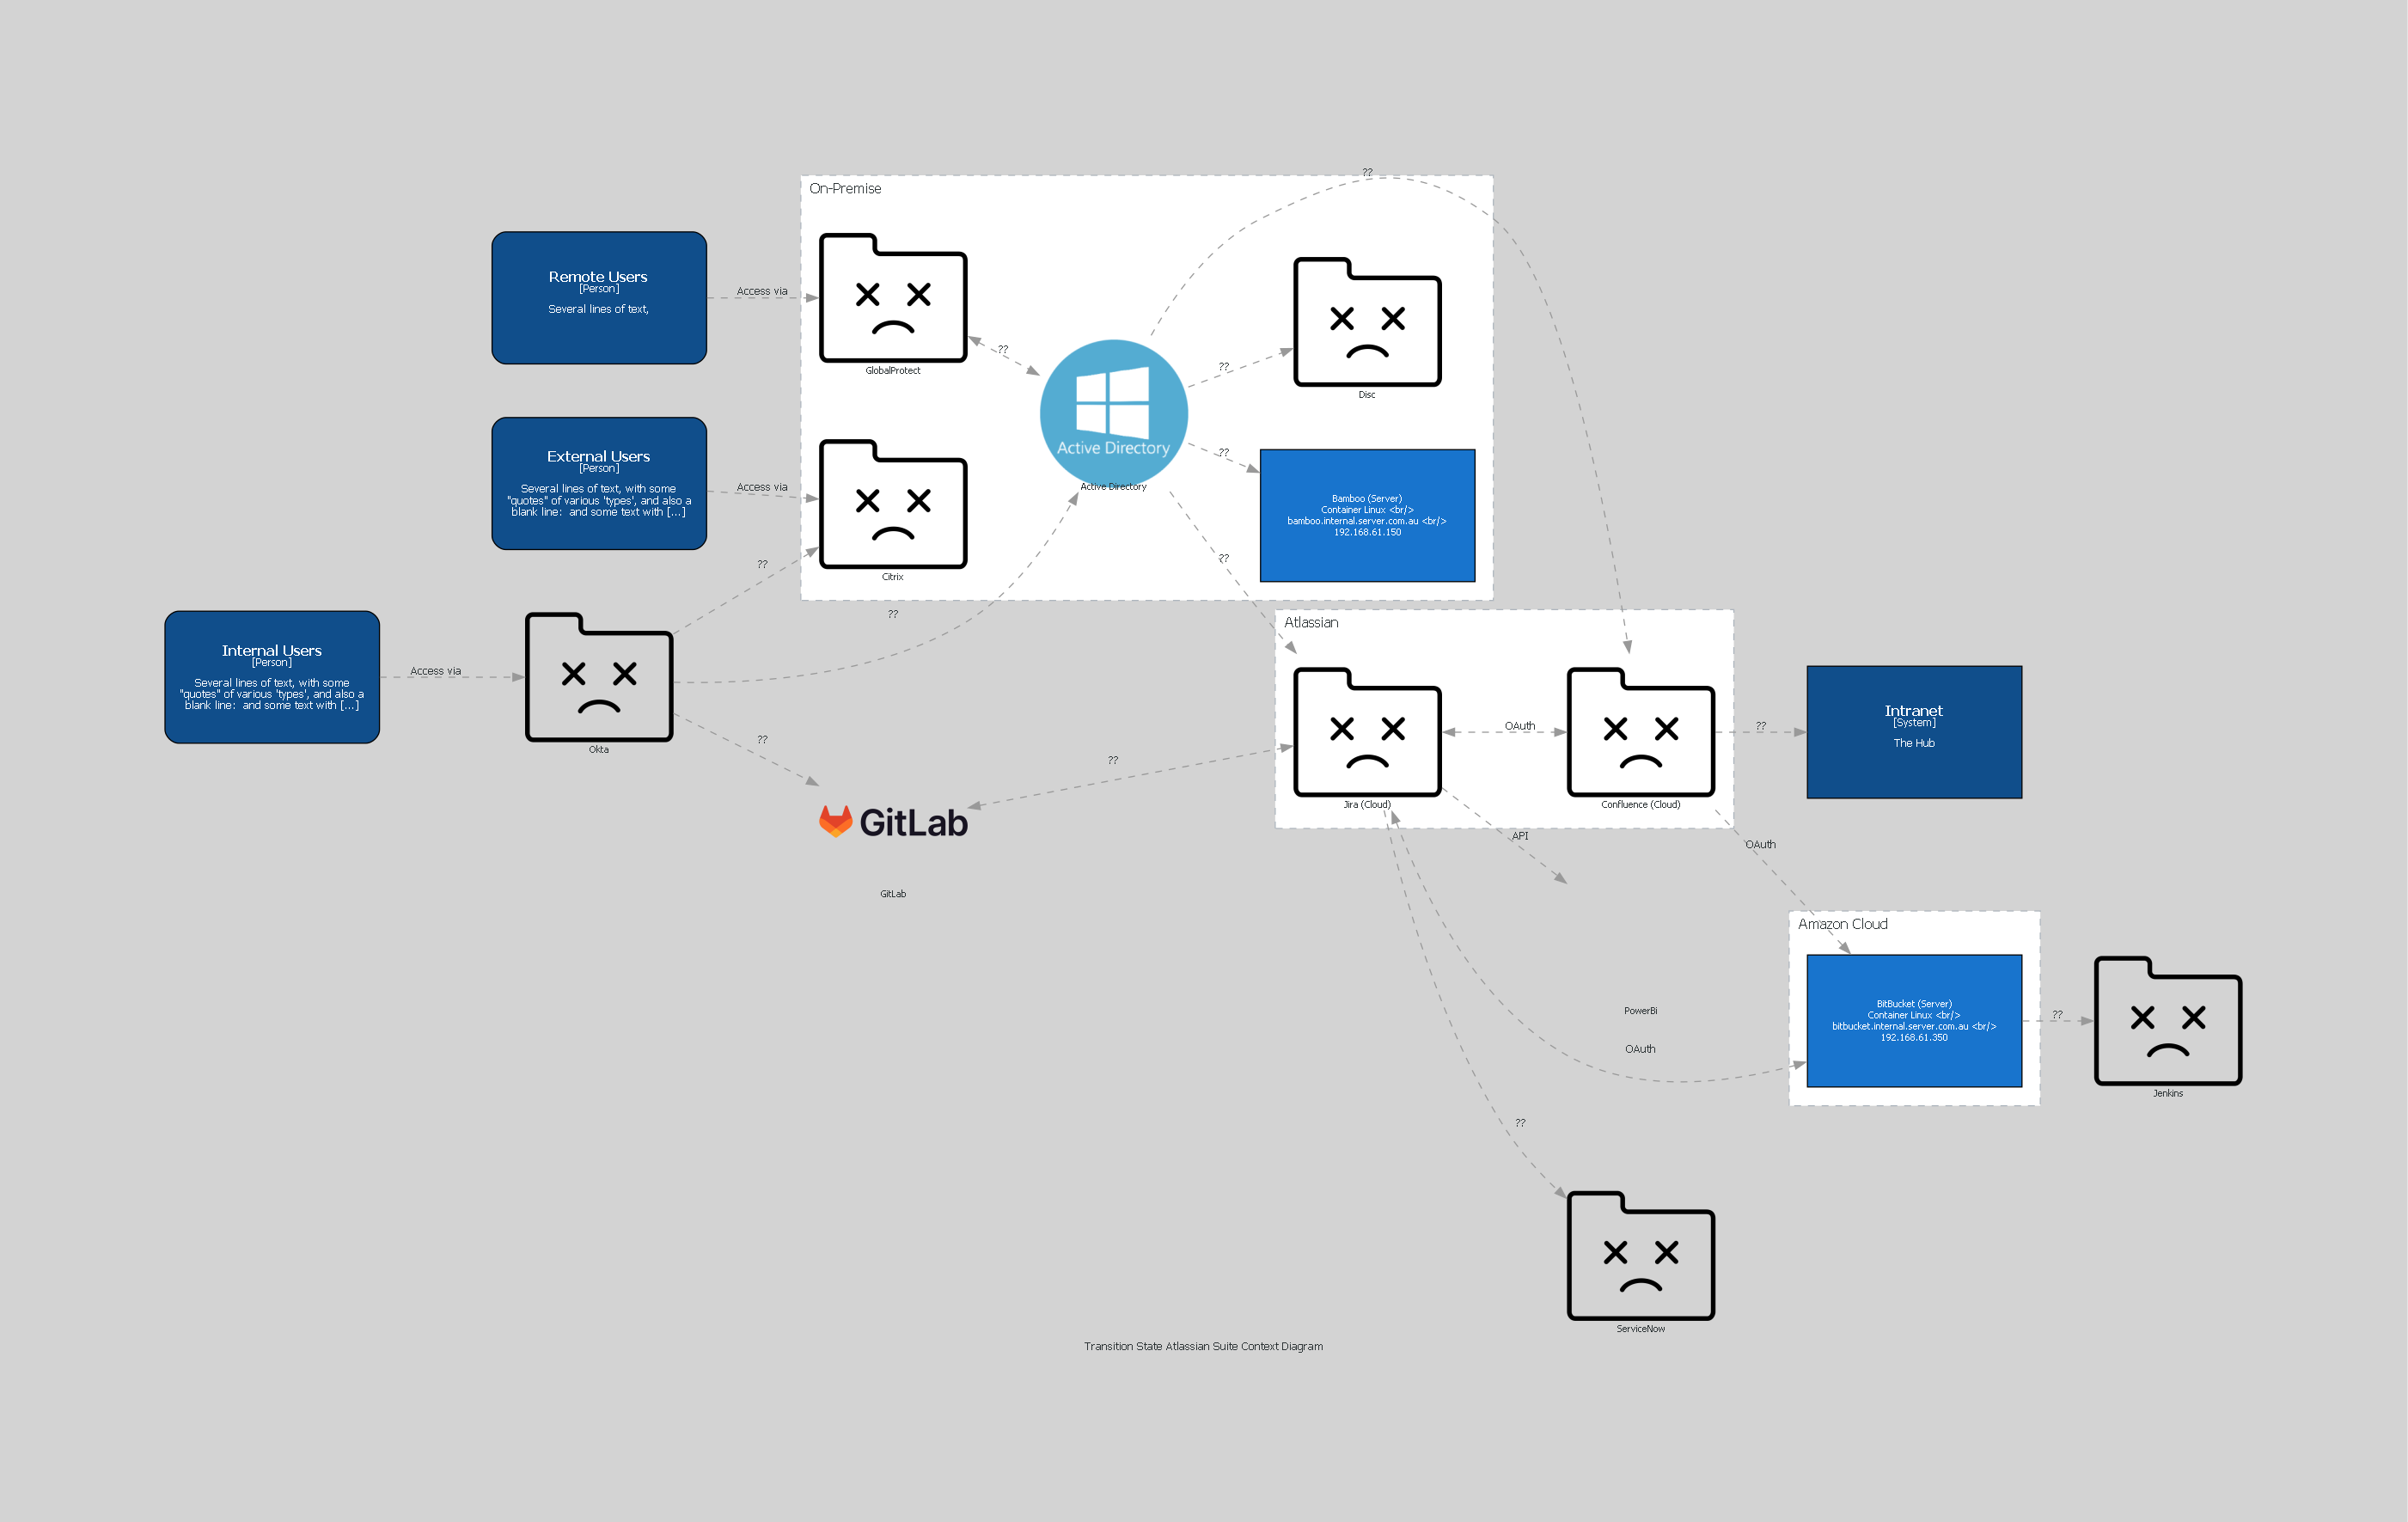

In [21]:
#@title Transition State Definition
from IPython.display import display, Markdown
from diagrams import Diagram
from diagrams.c4 import SystemBoundary, Relationship 
from _CloudingAtlassianRepository import Personas, InternalSystems, ExternalSystems

settings = { **default_settings, **{
  "name": "Transition State Atlassian Suite Context Diagram"
}}

with Diagram(** settings) as diagram:
  
  internalUsers = Personas.InternalUser.Get()
  remoteUsers = Personas.RemoteUser.Get()
  externalUsers = Personas.ExternalUser.Get()

  with SystemBoundary("On-Premise"):
    activeDirectory = InternalSystems.ActiveDirectory.Get()
    globalProtect = InternalSystems.GlobalProtect.Get()
    bamboo = InternalSystems.Bamboo.Get()
    disc = InternalSystems.Disc.Get()
    citrix = InternalSystems.Citrix.Get()

  with SystemBoundary("Amazon Cloud"):
    bitBucket = InternalSystems.BitBucket.Get()

  with SystemBoundary("Atlassian"):
    confluence = ExternalSystems.ConfluenceCloud.Get()
    jira = ExternalSystems.JiraCloud.Get()

  jenkins = InternalSystems.Jenkins.Get()
  serviceNow = InternalSystems.ServiceNow.Get()
  powerBi = InternalSystems.PowerBi.Get()
  internet = InternalSystems.Intranet.Get()
  okta = InternalSystems.Okta.Get()
  gitLab = InternalSystems.GitLab.Get()

  internalUsers >> Relationship("Access via") >> [okta]
  remoteUsers >> Relationship("Access via") >> [globalProtect]
  externalUsers >> Relationship("Access via") >> [citrix]
  okta >> Relationship("??") >> [gitLab, activeDirectory, citrix]
  jira >> Relationship("??") >> [serviceNow]
  gitLab >> Relationship("??") << [jira]
  jira >> Relationship("OAuth") << [bitBucket, confluence]
  globalProtect >> Relationship("??") << [activeDirectory]
  activeDirectory >> Relationship("??") >> [jira, confluence, bamboo, disc]
  confluence >> Relationship("??") >> [internet]
  confluence >> Relationship("OAuth") >> [bitBucket]
  jira >> Relationship("API") >> [powerBi]
  bitBucket >> Relationship("??") >> [jenkins]

display(Markdown("## " + settings["name"]))
display(diagram)

## Future State Atlassian Suite Context Diagram

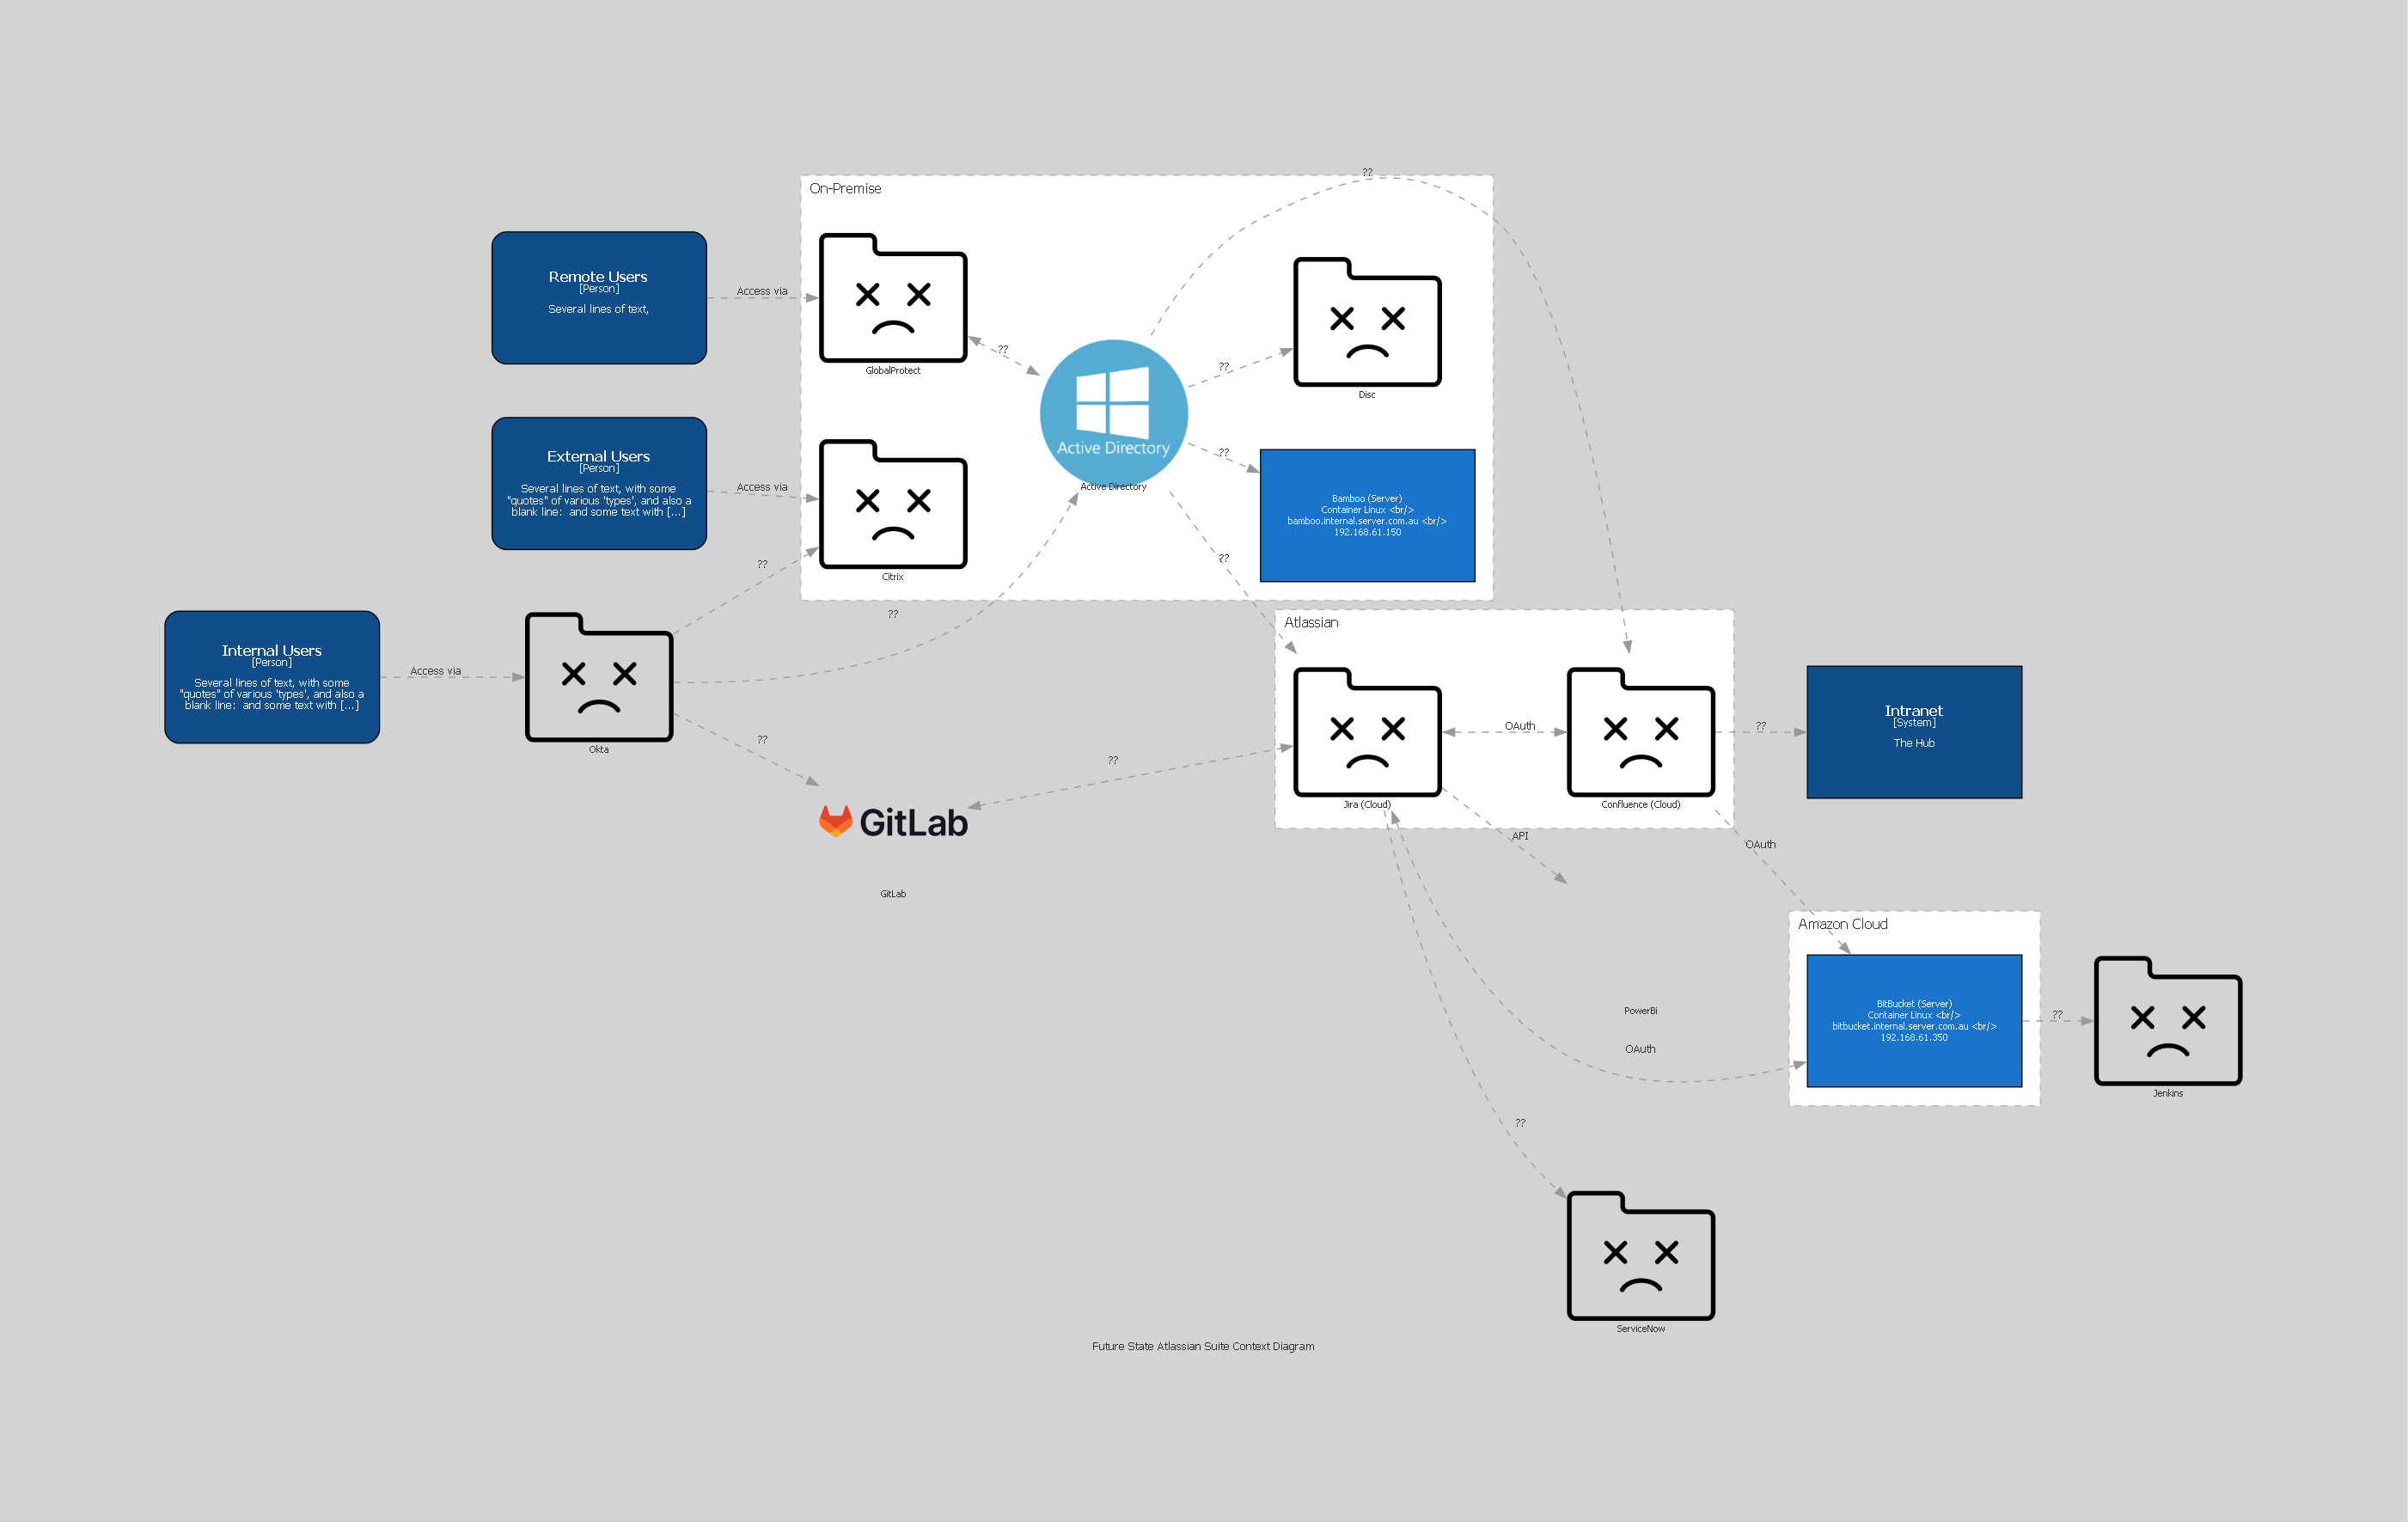

In [22]:
#@title Future State Definition
from IPython.display import display, Markdown
from diagrams import Diagram
from diagrams.c4 import SystemBoundary, Relationship
from _CloudingAtlassianRepository import Personas, InternalSystems, ExternalSystems

settings = { **default_settings, **{
  "name": "Future State Atlassian Suite Context Diagram"
}}

with Diagram(** settings) as diagram:
  
  internalUsers = Personas.InternalUser.Get()
  remoteUsers = Personas.RemoteUser.Get()
  externalUsers = Personas.ExternalUser.Get()

  with SystemBoundary("On-Premise"):
    activeDirectory = InternalSystems.ActiveDirectory.Get()
    globalProtect = InternalSystems.GlobalProtect.Get()
    bamboo = InternalSystems.Bamboo.Get()
    disc = InternalSystems.Disc.Get()
    citrix = InternalSystems.Citrix.Get()

  with SystemBoundary("Amazon Cloud"):
    bitBucket = InternalSystems.BitBucket.Get()

  with SystemBoundary("Atlassian"):
    confluence = ExternalSystems.ConfluenceCloud.Get()
    jira = ExternalSystems.JiraCloud.Get()

  jenkins = InternalSystems.Jenkins.Get()
  serviceNow = InternalSystems.ServiceNow.Get()
  powerBi = InternalSystems.PowerBi.Get()
  intranet = InternalSystems.Intranet.Get()
  okta = InternalSystems.Okta.Get()
  gitLab = InternalSystems.GitLab.Get()

  internalUsers >> Relationship("Access via") >> [okta]
  remoteUsers >> Relationship("Access via") >> [globalProtect]
  externalUsers >> Relationship("Access via") >> [citrix]
  okta >> Relationship("??") >> [gitLab, activeDirectory, citrix]
  jira >> Relationship("??") >> [serviceNow]
  gitLab >> Relationship("??") << [jira]
  jira >> Relationship("OAuth") << [bitBucket, confluence]
  globalProtect >> Relationship("??") << [activeDirectory]
  activeDirectory >> Relationship("??") >> [jira, confluence, bamboo, disc]
  confluence >> Relationship("??") >> [intranet]
  confluence >> Relationship("OAuth") >> [bitBucket]
  jira >> Relationship("API") >> [powerBi]
  bitBucket >> Relationship("??") >> [jenkins]

display(Markdown("## " + settings["name"]))
display(diagram)